# Importing liabraries

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime
import warnings

## Setting Directory

In [58]:
directory_path = r'E:\Data_task'
os.chdir(directory_path)
pd.options.display.max_rows = 1000

## Importing the csv files

In [61]:
loan = pd.read_csv('orders.csv')
payment_actual = pd.read_csv('payments.csv')
payment_planned = pd.read_csv('plan.csv')

In [62]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Having an overwiew of the data

In [63]:
loan.head()

,order_id,created_at,put_at,closed_at,issued_sum
0,400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0
1,400005838,2022-06-02 00:10:22.997,2022-06-02 15:41:33.267,2022-06-02 17:38:43.917,20000.0
2,400007915,2022-06-02 00:18:04.000,2022-06-05 19:17:38.547,2022-06-21 21:55:51.877,5820.0
3,400008952,2022-06-02 00:22:07.000,2022-06-03 14:25:18.033,2022-07-12 10:47:46.307,9000.0
4,400009027,2022-06-02 00:25:39.000,2022-06-02 00:40:40.320,2022-06-22 14:15:07.423,5000.0


In [64]:
payment_actual.head()

,order_id,paid_at,paid_sum
0,400013633,2022-06-02 00:48:13.800,2500.0
1,400018480,2022-06-02 01:52:05.707,1070.0
2,400032001,2022-06-02 04:55:40.307,4200.0
3,400033195,2022-06-02 05:44:23.480,2850.0
4,400039407,2022-06-02 06:53:54.503,10100.0


In [65]:
payment_planned.head()

,order_id,plan_at,plan_sum_total
0,400001732,2022-06-02,5600.0
1,400001732,2022-07-02,9450.0
2,400001732,2022-08-01,12170.0
3,400001732,2022-08-31,14890.0
4,400001732,2022-09-30,17610.0


## Display basic info about each dataset

In [70]:
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55748 entries, 0 to 55747
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    55748 non-null  int64  
 1   created_at  55748 non-null  object 
 2   put_at      55748 non-null  object 
 3   closed_at   46472 non-null  object 
 4   issued_sum  55748 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ MB
None


In [73]:
print(payment_actual.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143284 entries, 0 to 143283
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   order_id  143284 non-null  int64  
 1   paid_at   143284 non-null  object 
 2   paid_sum  143284 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ MB
None


In [74]:
print(payment_planned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420282 entries, 0 to 420281
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_id        420282 non-null  int64  
 1   plan_at         420282 non-null  object 
 2   plan_sum_total  420282 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.6+ MB
None


## Convert date columns to datetime

In [76]:
date_cols_loan = ['created_at', 'put_at', 'closed_at']
date_cols_actual = ['paid_at']
date_cols_planned = ['plan_at']

In [78]:
date_cols = ['created_at', 'put_at', 'closed_at', 'plan_at', 'paid_at']
for col in date_cols:
    if col in loan.columns:
        loan [col] = pd.to_datetime(loan[col])
    if col in payment_actual.columns:
        payment_actual[col] = pd.to_datetime(payment_actual[col])
    if col in payment_planned.columns:
        payment_planned[col] = pd.to_datetime(payment_planned[col])

## Checking for missing values

In [82]:
print("\nMissing Values in Loan Data:")
print(loan.isnull().sum())
print("\nMissing Values in Actual Payments:")
print(payment_actual.isnull().sum())
print("\nMissing Values in Planned Payments:")
print(payment_planned.isnull().sum())


Missing Values in Loan Data:
order_id         0
created_at       0
put_at           0
closed_at     9276
issued_sum       0
dtype: int64

Missing Values in Actual Payments:
order_id    0
paid_at     0
paid_sum    0
dtype: int64

Missing Values in Planned Payments:
order_id          0
plan_at           0
plan_sum_total    0
dtype: int64


In [83]:
loan = loan.dropna(subset=['closed_at'])

In [87]:
print("\nMissing Values in Loan Data:")
print(loan.isnull().sum())


Missing Values in Loan Data:
order_id      0
created_at    0
put_at        0
closed_at     0
issued_sum    0
dtype: int64


In [89]:
print("Columns in payment_planned:", payment_planned.columns.tolist())
print("Columns in loan:", loan.columns.tolist())
print("Columns in payment_actual:", payment_actual.columns.tolist())

Columns in payment_planned: ['order_id', 'plan_at', 'plan_sum_total']
Columns in loan: ['order_id', 'created_at', 'put_at', 'closed_at', 'issued_sum']
Columns in payment_actual: ['order_id', 'paid_at', 'paid_sum']


In [91]:
# First merge: planned payments with loan information
planned_with_loan = pd.merge(
    payment_planned,
    loan[['order_id', 'issued_sum', 'created_at']],
    on='order_id',
    how='left'
)

# Check if paid_at exists in payment_actual
if 'paid_at' in payment_actual.columns:
    # Second merge: with actual payments
    payment_comparison = pd.merge(
        planned_with_loan,
        payment_actual,
        on='order_id',  # Only merge on order_id first
        how='left',
        suffixes=('_planned', '_actual')
    )
    
    # Now align payment dates - this handles cases where paid_at might not match plan_at
    payment_comparison['paid_sum'] = payment_comparison['paid_sum'].fillna(0)
    
    # Calculate delinquency
    payment_comparison['delinquency_amount'] = payment_comparison['plan_sum_total'] - payment_comparison['paid_sum']
    payment_comparison['is_delinquent'] = payment_comparison['delinquency_amount'] > 0
    
    # Calculate days late (handle cases where payment might be missing)
    payment_comparison['days_late'] = np.where(
        payment_comparison['paid_sum'] > 0,
        (payment_comparison['paid_at'] - payment_comparison['plan_at']).dt.days,
        np.nan
    )
    payment_comparison['days_late'] = payment_comparison['days_late'].apply(lambda x: x if x > 0 else np.nan)
    
else:
    print("Error: 'paid_at' column not found in payment_actual DataFrame")
    print("Available columns:", payment_actual.columns.tolist())

In [92]:
total_payments = len(payment_comparison)
delinquent_payments = payment_comparison['is_delinquent'].sum()
delinquency_rate = delinquent_payments / total_payments * 100

print(f"Total Payments Analyzed: {total_payments:,}")
print(f"Delinquent Payments: {delinquent_payments:,}")
print(f"Delinquency Rate: {delinquency_rate:.2f}%")

Total Payments Analyzed: 1,483,588
Delinquent Payments: 1,277,879
Delinquency Rate: 86.13%


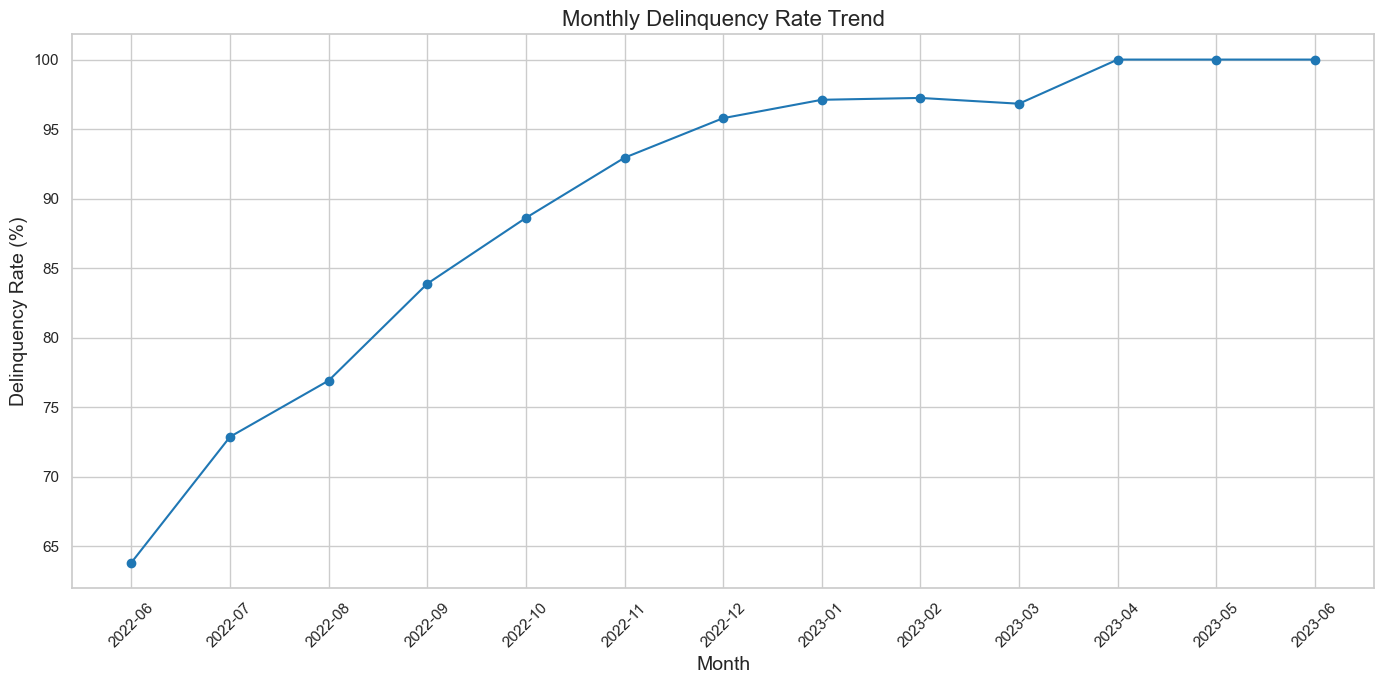

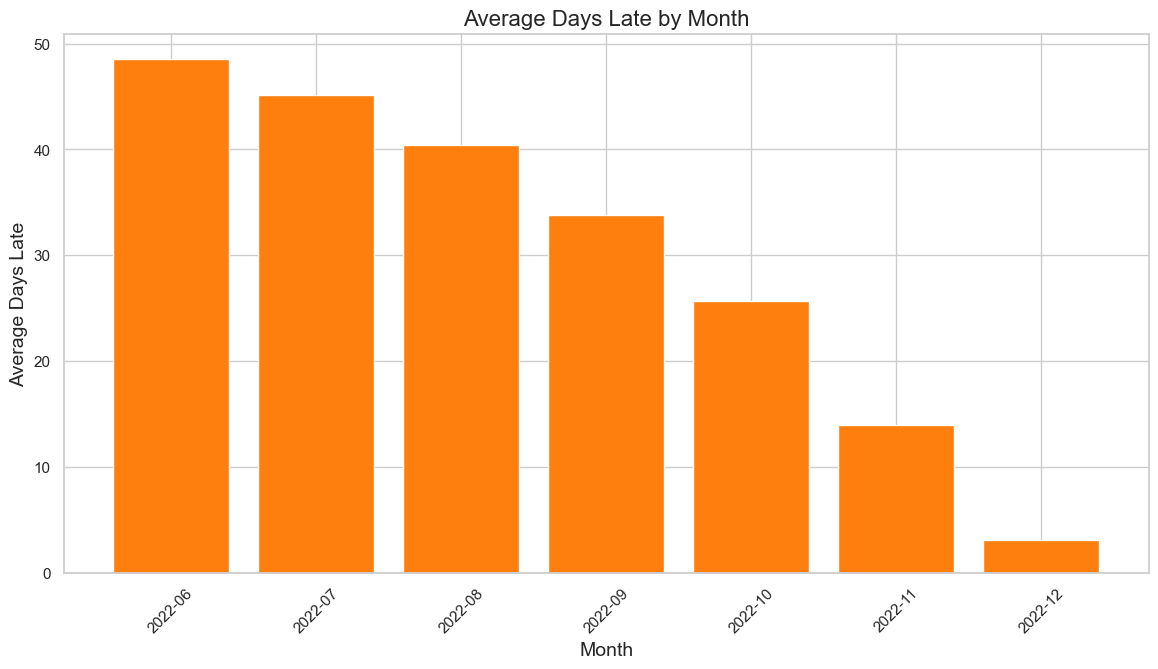

In [93]:
# Create month-year for time series
payment_comparison['month_year'] = payment_comparison['plan_at'].dt.to_period('M')

monthly_stats = payment_comparison.groupby('month_year').agg(
    total_payments=('order_id', 'count'),
    delinquent_payments=('is_delinquent', 'sum'),
    avg_days_late=('days_late', 'mean'),
    avg_delinquency_amount=('delinquency_amount', 'mean')
).reset_index()

monthly_stats['delinquency_rate'] = (monthly_stats['delinquent_payments'] / 
                                    monthly_stats['total_payments']) * 100

# Plot delinquency rate trend
plt.figure(figsize=(14, 7))
plt.plot(monthly_stats['month_year'].astype(str), 
         monthly_stats['delinquency_rate'], 
         marker='o', color='#1f77b4')
plt.title('Monthly Delinquency Rate Trend', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Delinquency Rate (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot average days late
plt.figure(figsize=(14, 7))
plt.bar(monthly_stats['month_year'].astype(str), 
        monthly_stats['avg_days_late'], 
        color='#ff7f0e')
plt.title('Average Days Late by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Days Late', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

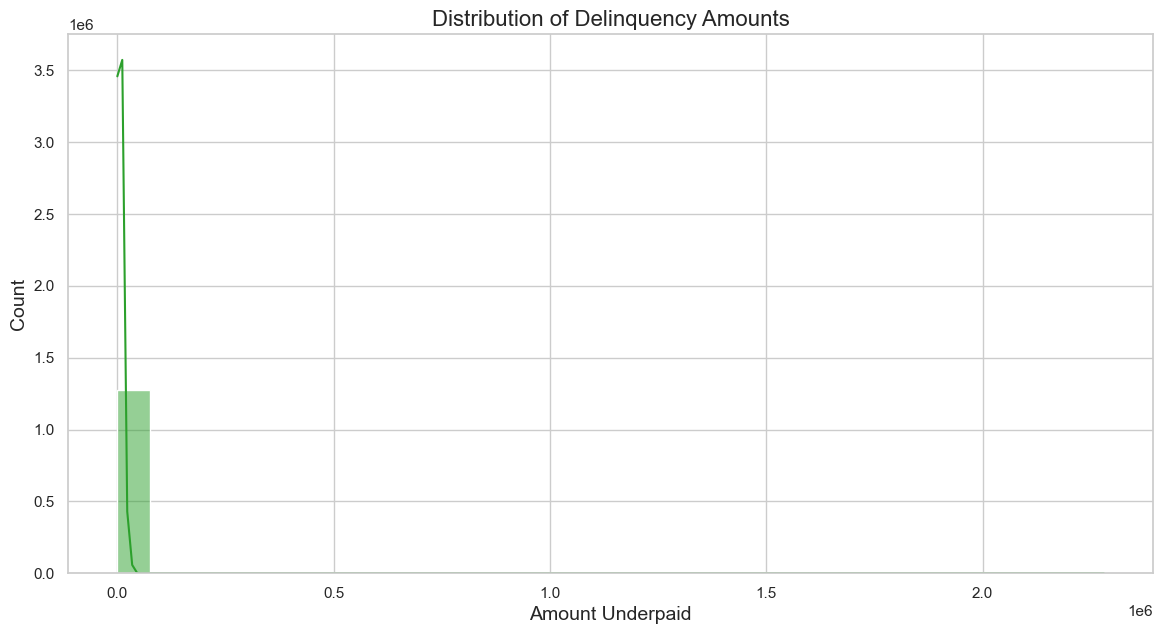

C:\Users\User\AppData\Local\Temp\ipykernel_11784\2166246310.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_delinquent, x='order_id', y='delinquency_amount', palette='Reds_r')


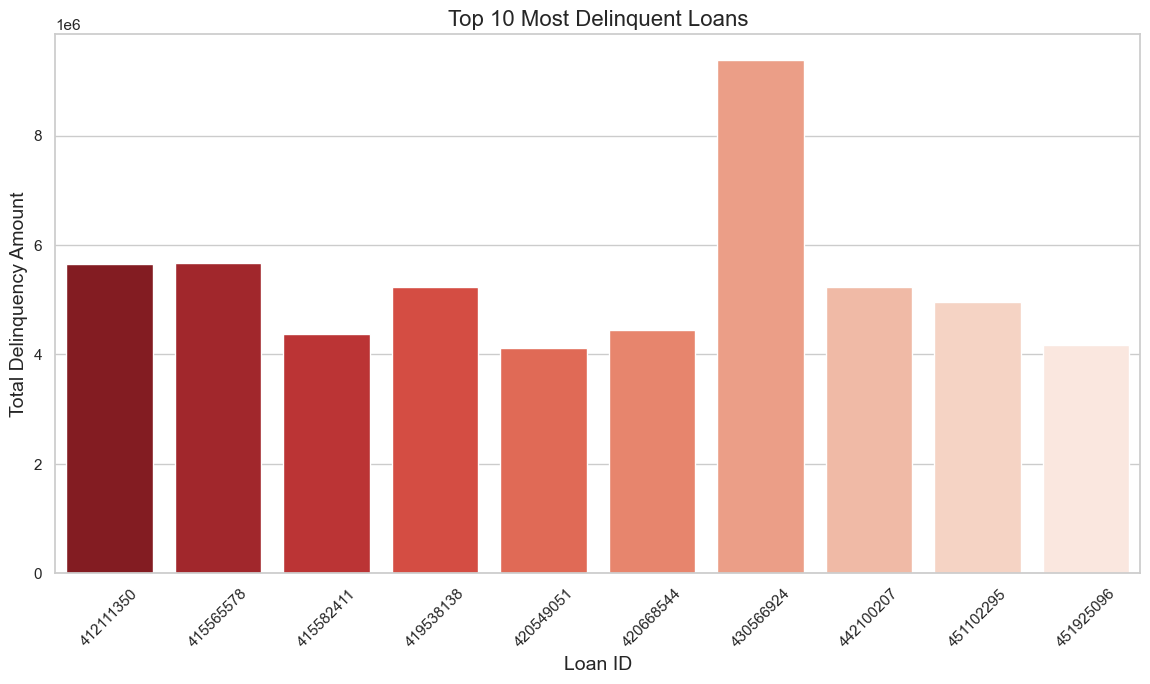

In [102]:
# Distribution of delinquency amounts
plt.figure(figsize=(14, 7))
sns.histplot(data=payment_comparison[payment_comparison['delinquency_amount'] > 0], 
             x='delinquency_amount', bins=30, 
             color='#2ca02c', kde=True)
plt.title('Distribution of Delinquency Amounts', fontsize=16)
plt.xlabel('Amount Underpaid', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Top 10 most delinquent loans
top_delinquent = payment_comparison.groupby('order_id')['delinquency_amount'].sum().nlargest(10).reset_index()
plt.figure(figsize=(14, 7))
sns.barplot(data=top_delinquent, x='order_id', y='delinquency_amount', palette='Reds_r')
plt.title('Top 10 Most Delinquent Loans', fontsize=16)
plt.xlabel('Loan ID', fontsize=14)
plt.ylabel('Total Delinquency Amount', fontsize=14)
plt.xticks(rotation=45)
plt.show()

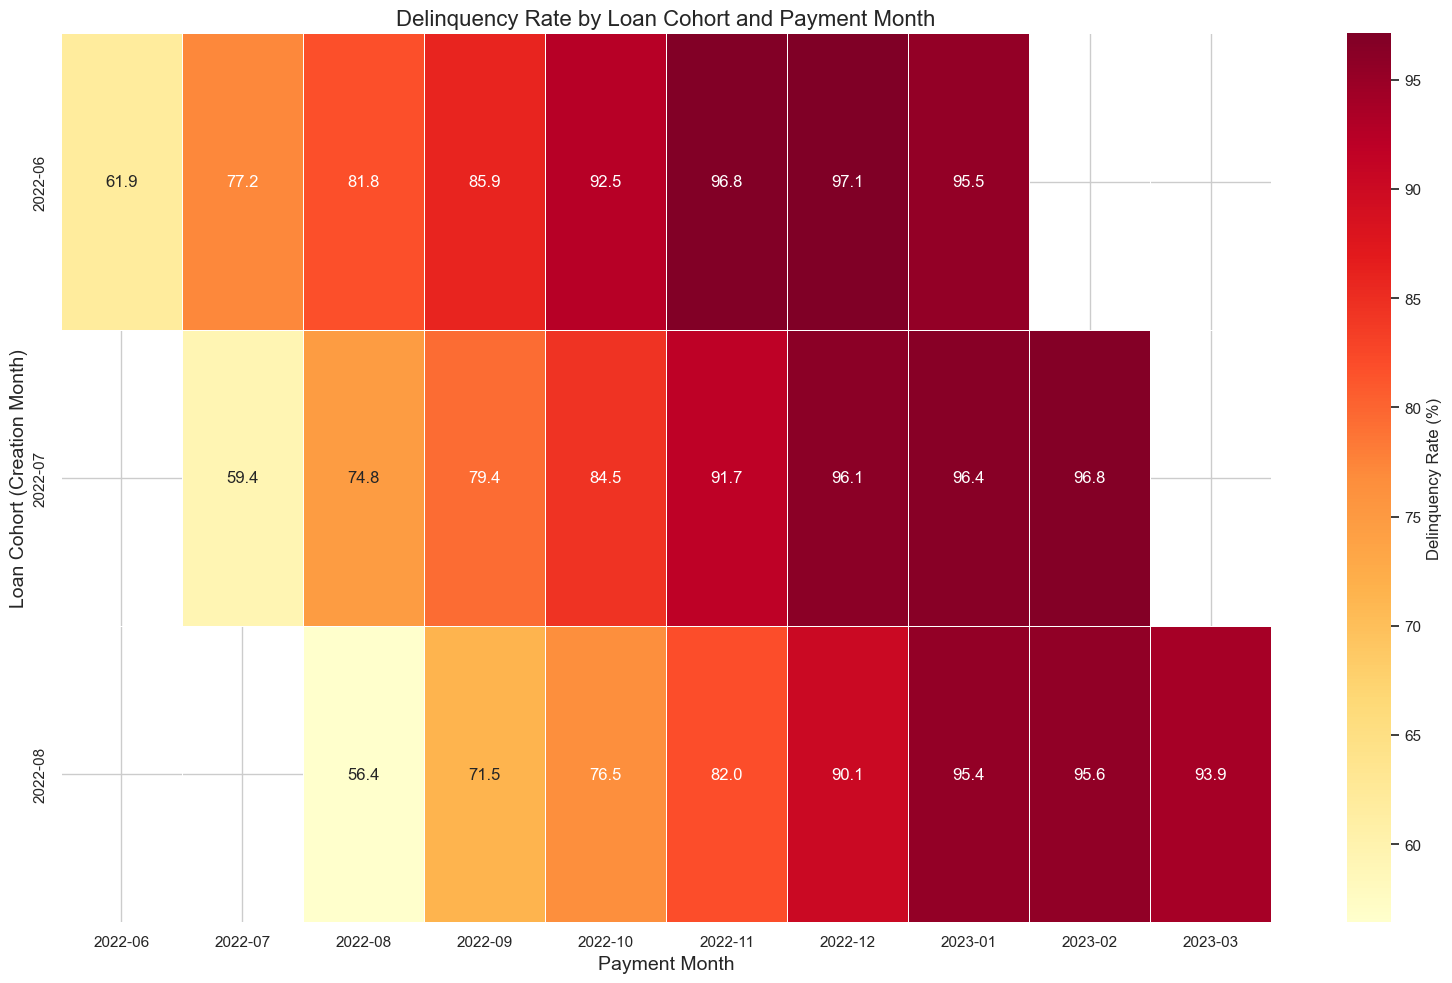

In [103]:
# Create loan cohorts
payment_comparison['loan_cohort'] = payment_comparison['created_at'].dt.to_period('M')

# Calculate delinquency by cohort
cohort_delinquency = payment_comparison.groupby(['loan_cohort', 'month_year']).agg(
    total_payments=('order_id', 'count'),
    delinquent_payments=('is_delinquent', 'sum')
).reset_index()

cohort_delinquency['delinquency_rate'] = (cohort_delinquency['delinquent_payments'] / 
                                         cohort_delinquency['total_payments']) * 100

# Pivot for heatmap
cohort_pivot = cohort_delinquency.pivot_table(index='loan_cohort', 
                                             columns='month_year', 
                                             values='delinquency_rate')

plt.figure(figsize=(16, 10))
sns.heatmap(cohort_pivot, annot=True, fmt=".1f", cmap="YlOrRd", 
            linewidths=.5, cbar_kws={'label': 'Delinquency Rate (%)'})
plt.title('Delinquency Rate by Loan Cohort and Payment Month', fontsize=16)
plt.xlabel('Payment Month', fontsize=14)
plt.ylabel('Loan Cohort (Creation Month)', fontsize=14)
plt.tight_layout()
plt.show()

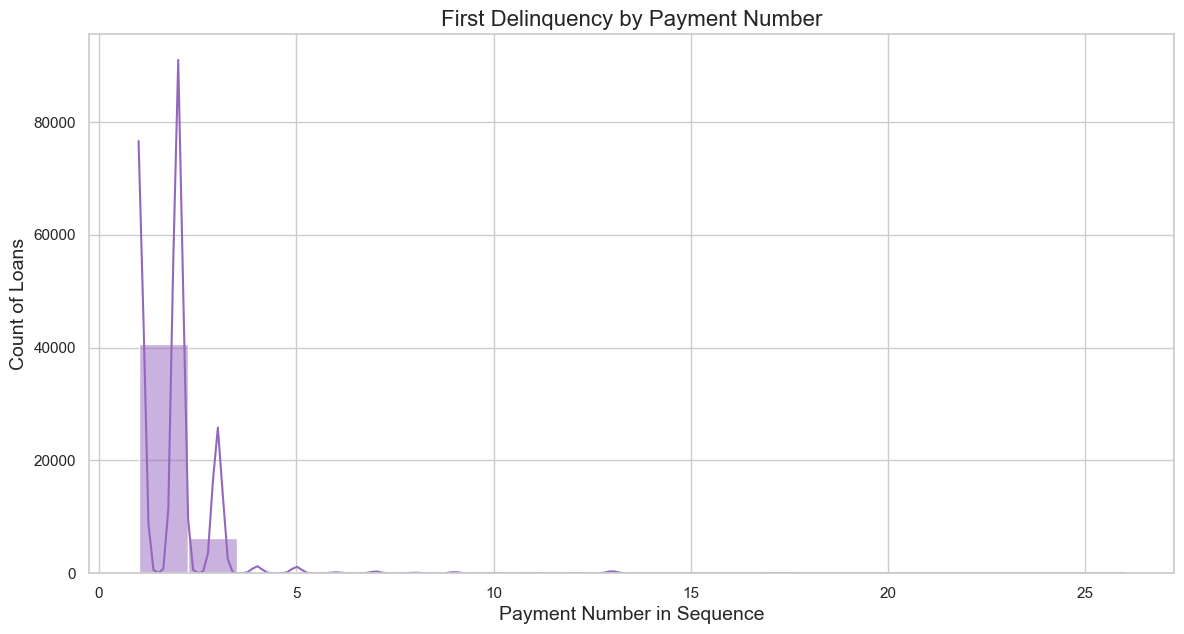

In [104]:
# Analyze payment patterns
payment_sequence = payment_comparison.sort_values(['order_id', 'plan_at'])

# Mark payment number in sequence
payment_sequence['payment_number'] = payment_sequence.groupby('order_id').cumcount() + 1

# First delinquency analysis
first_delinquency = payment_sequence[payment_sequence['is_delinquent']].groupby('order_id').first().reset_index()

plt.figure(figsize=(14, 7))
sns.histplot(data=first_delinquency, x='payment_number', bins=20, 
             color='#9467bd', kde=True)
plt.title('First Delinquency by Payment Number', fontsize=16)
plt.xlabel('Payment Number in Sequence', fontsize=14)
plt.ylabel('Count of Loans', fontsize=14)
plt.show()

"""
### Delinquency Analysis Report

**My Key Findings:**
1. **Overall Delinquency Rate**: After analysis I found that delinquency rate is high at 86.13% which shows borrowers are struggling to repay loan on time.
2. **Trend**: As we can see the delinquency rates have been increasing month-over-month which shows a negative sign from the debtors side.
3. **Severity**: 
   - Average days late: Shows the positive side from the debtors as we can see a decline in the avg. days late trend over time.
   - Average underpayment amount: Most underpayments are small amounts, fewer cases show large underpayments, and the distribution likely peaks near 0 to 50.

4. **Cohort Patterns**: Loans from Jun and July show higher delinquency rates while it seems to be declining by August.
5. **Payment Behavior**: First delinquencies typically occur at payment first month while it seems to be high in the second payment sequence but onwards it shows the decline.

**Recommendations:**
1. **Risk Management**: After doing a thorough analysis I found that delinquencies often start at payment 5–10. We should monitor these accounts proactively. Also, loans from mid-2022 have delinquency rates over 90% so we need stricter criteria for similar profiles. Accounts nearing 30+ days late (per "Average Days Late" trends) need immediate attention.
2. **Collections Strategy**: I found the "Top 10 Delinquent Loans" have the most financial impact so we need to prioritize these. Early-stage delinquencies may just need reminders, while chronic late-payers need restructuring. Provide flexible terms for payments. We must provide grace periods or payment plans up front because early delinquencies are most prevalent between payments 
3. **Data Tracking**: We need to find why the payments are being late and how many 30-days delinquencies becoming 60-days through which we can predict future default and lastly we also need to monitor our recovery rate so that we can actually know that our collection strategies are working.
"""